**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

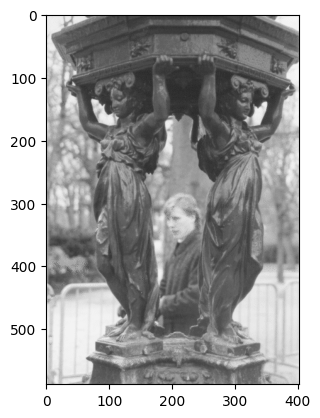

In [5]:
# code here
img = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [40]:
def addRowColMatrix(img, size=3):
    incr = int(size/2)
    newImg = np.zeros((img.shape[0]+2*incr,img.shape[1]+2*incr))
    newImg[incr:incr+img.shape[0], incr:incr+img.shape[1]] = img
    return newImg

def median(img, x,y, size=3):
    incr = int(size/2)
    vector = np.sort(img[x-incr:x+incr+1,y-incr:y+incr+1].ravel())
    return vector[int(len(vector)/2)]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 240., 230., 239., 234., 235.],
       [  0.,   0.,   0.,   0.,   0., 230., 240., 234., 239., 234.],
       [  0.,   0.,   0.,   0.,   0., 240., 234., 242., 234., 242.],
       [  0.,   0.,   0.,   0.,   0., 240., 230., 239., 234., 239.],
       [  0.,   0.,   0.,   0.,   0., 240., 234., 240., 234., 242.]])

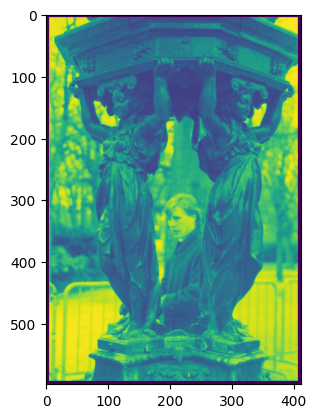

In [46]:
temp = addRowColMatrix(img, size=10)
plt.imshow(temp)
temp[0:10,0:10]

In [49]:
median(img,7,8,size=7)

234

In [54]:
def applyFilterMedian(img, size):
    temp = addRowColMatrix(img, size)
    newImg = np.zeros(img.shape) 
    incr = int(size/2)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            x = i + incr
            y = j + incr
            newImg[i,j] = median(temp, x, y, size)
    return newImg

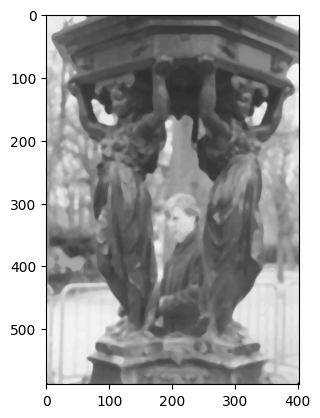

In [55]:
temp = applyFilterMedian(img, 7)
plt.imshow(temp, cmap='gray', vmin=0, vmax=255)

<Figure size 640x480 with 0 Axes>

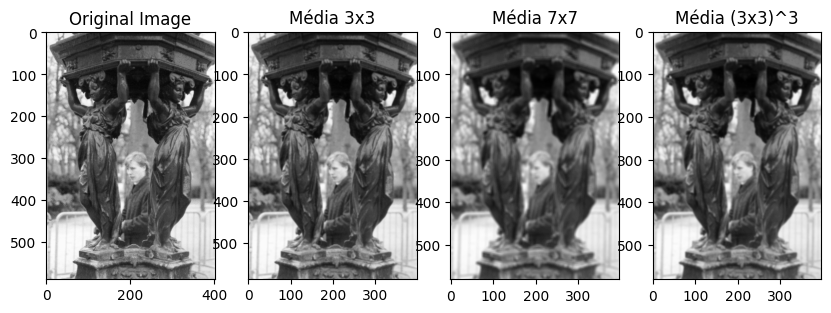

In [119]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(10,7))

axarr[0].imshow(img, cmap='gray')

mask = mediaMask(sizeX=3, sizeY=3)
axarr[1].imshow(applyFilter(img, mask), cmap='gray')

mask = mediaMask(sizeX=7, sizeY=7)
axarr[2].imshow(applyFilter(img, mask), cmap='gray')

mask = mediaMask(sizeX=3, sizeY=3)
temp = applyFilter(img, mask)
temp = applyFilter(temp, mask)
temp = applyFilter(temp, mask)
axarr[3].imshow(temp, cmap='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('Média 3x3')
axarr[2].set_title('Média 7x7')
axarr[3].set_title('Média (3x3)^3')

plt.show()

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

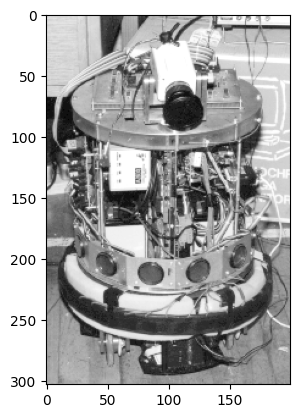

In [76]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

In [61]:
def functionG(x, y, sigma):
    return 1/(2*np.pi*sigma*sigma)*np.e**(-1*(x**2+y**2)/(2*sigma**2))

In [93]:
def gaussMask(sizeX=3, sizeY=3, sigma=1):
    varX = int( (sizeX-1)/2 )
    varY = int( (sizeY-1)/2 )
    mat = np.zeros(((2*varX+1),(2*varY+1)))
    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):
            mat[i,j] = functionG(i-varX,j-varY,sigma)
    return 1/np.sum(mat)*mat

In [115]:
def mediaMask(sizeX=3, sizeY=3):
    varX = int( (sizeX-1)/2 )
    varY = int( (sizeY-1)/2 )
    mat = np.ones(((2*varX+1),(2*varY+1)))
    return 1/np.sum(mat)*mat

In [116]:
mediaMask(sizeX=3, sizeY=3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [94]:
def convolution(mat1, mat2):
    return np.sum(mat1 * mat2)

In [100]:
def applyFilter(img, mask):
    varX = int( (mask.shape[0]-1)/2 )
    varY = int( (mask.shape[1]-1)/2 )
    newImg = np.zeros((img.shape[0]-2*varX, img.shape[1]-2*varY))
    for i in range(varX,img.shape[0]-varX):
        for j in range(varY,img.shape[1]-varY):
            newImg[i-varX,j-varY] = convolution( img[i-varX:i+varX+1,j-varY:j+varY+1], mask )
    return newImg

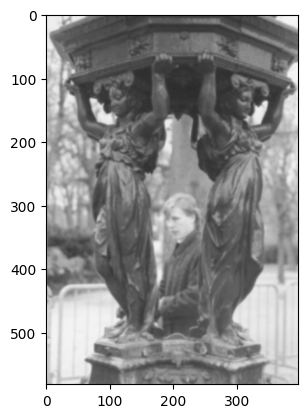

In [104]:
mask = gaussMask(sizeX=7, sizeY=7, sigma=1)
temp = applyFilter(img, mask)
plt.imshow(temp, cmap='gray', vmin=0, vmax=255)

<Figure size 640x480 with 0 Axes>

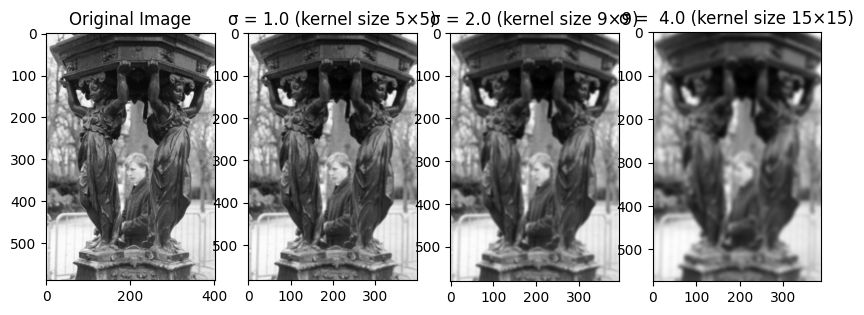

In [105]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(10,7))
#σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).
axarr[0].imshow(img, cmap='gray')
mask = gaussMask(sizeX=5, sizeY=5, sigma=1)
axarr[1].imshow( applyFilter(img, mask), cmap='gray')
mask = gaussMask(sizeX=9, sizeY=9, sigma=2)
axarr[2].imshow( applyFilter(img, mask), cmap='gray')
mask = gaussMask(sizeX=15, sizeY=15, sigma=4)
axarr[3].imshow( applyFilter(img, mask), cmap='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('σ = 1.0 (kernel size 5×5)')
axarr[2].set_title('σ = 2.0 (kernel size 9×9)')
axarr[3].set_title('σ =  4.0 (kernel size 15×15)')

plt.show()

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

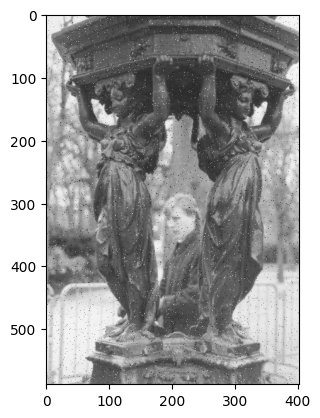

In [112]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

<Figure size 640x480 with 0 Axes>

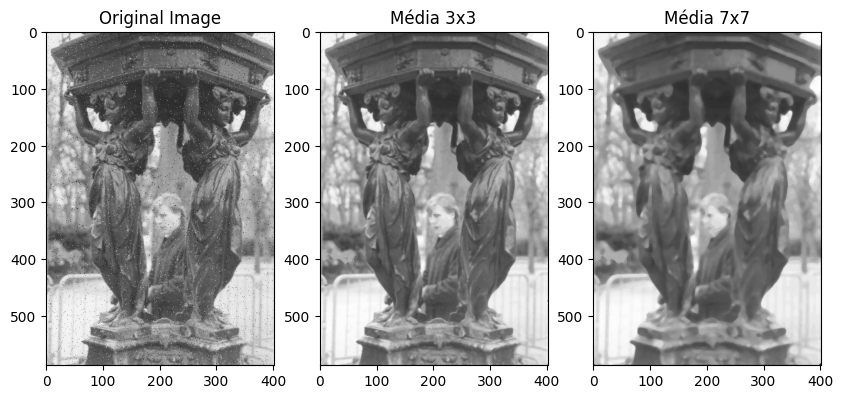

In [113]:
plt.figure()
f, axarr = plt.subplots(1,3, figsize=(10,7))

axarr[0].imshow(img3, cmap='gray')
axarr[1].imshow(applyFilterMedian(img3, 3), cmap='gray')
axarr[2].imshow(applyFilterMedian(img3, 7), cmap='gray')


axarr[0].set_title('Original Image')
axarr[1].set_title('Média 3x3')
axarr[2].set_title('Média 7x7') 

plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

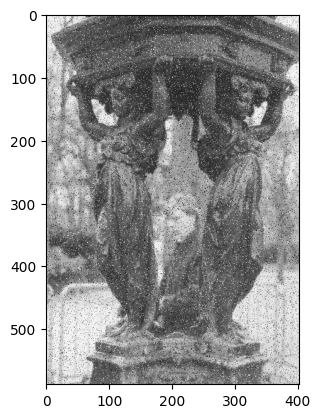

In [109]:
#  code here
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

<Figure size 640x480 with 0 Axes>

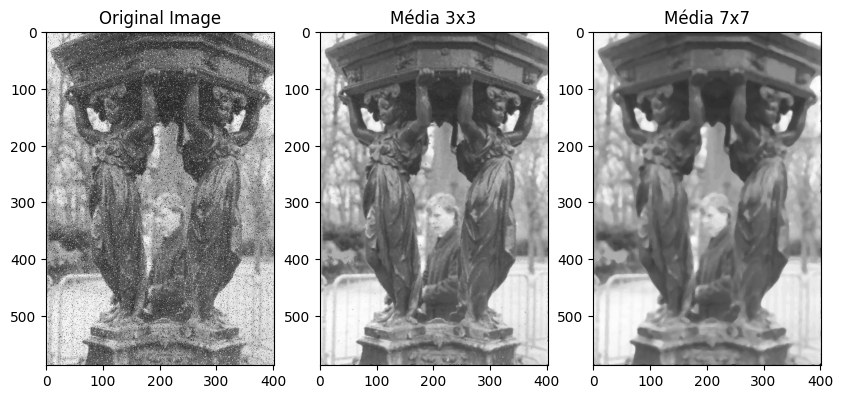

In [111]:
plt.figure()
f, axarr = plt.subplots(1,3, figsize=(10,7))

axarr[0].imshow(img3, cmap='gray')
axarr[1].imshow(applyFilterMedian(img3, 3), cmap='gray')
axarr[2].imshow(applyFilterMedian(img3, 7), cmap='gray')


axarr[0].set_title('Original Image')
axarr[1].set_title('Média 3x3')
axarr[2].set_title('Média 7x7')

plt.show()